# Research Questions

**[RQ1]** In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

We first import the librare we need to make our job easier. We found out about these libraries during the lab class, by the submission of the HW itself or by google it. 

In [1]:
import pandas
import pandas as pd
import numpy as np
import re
from datetime import datetime, time
import matplotlib.pyplot as plt

The *read_cvs* function opens the file in cvs format. Inside this function we indicate the columns we will use, and the *dtype* of each column, this helps Jupyter to read cvs faster.

In [2]:
def read_csv(month,number):
    cmd= month+"=pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'tpep_pickup_datetime':str,'PULocationID':int}, usecols=['tpep_pickup_datetime','PULocationID'])"
    exec(cmd)
    return eval(month)

The *clean_errors* function: reading files we discoreved the are some errors related to dates. For example inside Jan's file we could find datas about December (of the year before) and February, and so on for the other months. 
We decided to clean the files by deleting the datas those were not precised. This funtion, to run, needs an df=DataFrame and n=the right month's numer (EX: for January, n=1).

In [3]:
def clean_errors(df,n):
    df['tpep_pickup_datetime']=pandas.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    cmd="df.loc[:,'month']=df['tpep_pickup_datetime'].dt.month"
    exec(cmd)
    cmd="df[df['month'] == "+str(n)+"]"
    df=eval(cmd)
    del cmd
    del df['month']
    return df

The function *merge_zone* merge two different DataFrame, it takes as input a speciific DataFrame then it clean it by the right date and, at the end, it merges it with the DataFrame containing the different zones of NYC.

In [4]:
def merge_zone(df,n):
    zone=pd.read_csv('taxi _zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
    df=clean_errors(df,n)
    df.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
    df = pd.merge(zone, df, on='LocationID')
    del zone
    return df

dictonary *d* helps us to call the different files, by the first three letter of each month as key, for each key it indicates the *n* and the lenght of the month (count by days)

In [5]:
d={'jan':[1,31],'feb':[2,28],'mar':[3,31],'apr':[4,30],'may':[5,31],'jun':[6,30]}


The function *count_per_borough* count for each borough the avarage of the trips per day

In [6]:
def count_per_borough(df,bor,n):
    cmd= "df.loc[(df['Borough']=='"+(bor)+"')]"
    g=eval(cmd)
    m=len(g)//n
    del g
    return m

The funtion *create_dict* , by a DataFrame (**df**, describing the situation for each month) and a **n** (number of days of the month), it creates a dictonary having two keys: "boroughs" and the "avarage" of the number of taxi's trips for each month.

In [7]:
def create_dict(df,n):
    bor=['EWR',"Queens","Bronx","Manhattan","Staten Island","Unknown",'Brooklyn']
    final={}
    final['Borough']=[]
    final['avarage']=[]
    for i in bor:
        m=count_per_borough(df,i,n)
        final['Borough'].append(i)
        final['avarage'].append(m)
    return final

With this loop we manage to create a DataFrame for each month (ex:d_jan, d_feb). this will help us to show a plot describing simultanuely the issue.

In [22]:
for i in d:
    number=d[i][0]
    n=d[i][1]
    cmd='read_csv("'+str(i)+'",number)'
    df=eval(cmd)
    df=merge_zone(df,number)
    cmd='d_'+str(i)+'=create_dict(df,n)'
    exec(cmd)
    del df

C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


*list* is a list containing all the names of the DataFrame of the months.
*bor* is a list containing the names of the Boroughs of NYC

In [23]:
list=[d_jan,d_feb,d_mar,d_apr,d_may,d_jun]
bor=['EWR',"Queens","Bronx","Manhattan","Staten_Island","Unknown",'Brooklyn']

Now we are going to create a DataFrame, called *tab*, with all the boroughs and all the avarages of the trips per day for each month. *Tab* is showed later.

In [24]:
tab= pandas.DataFrame(index=bor)
for i in d:
    cmd='d_'+i+'["avarage"]'
    tab[i]=eval(cmd)

In [25]:
tab

,jan,feb,mar,apr,may,jun
EWR,18,17,21,23,24,22
Queens,16996,17303,18218,19876,19703,19157
Bronx,238,234,333,347,350,340
Manhattan,256948,277401,276368,280945,269345,262610
Staten_Island,4,3,4,4,4,5
Unknown,5126,4907,5250,5001,4150,4208
Brooklyn,3233,3396,3965,3968,3961,4098


The next plot will help us to see the behaviour of the fenomenous at a very large scale, even if it's not very precise. Afterwards we will make other plots more precise.


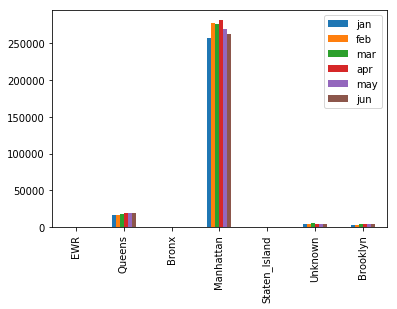

In [26]:
tab.plot(kind='bar')

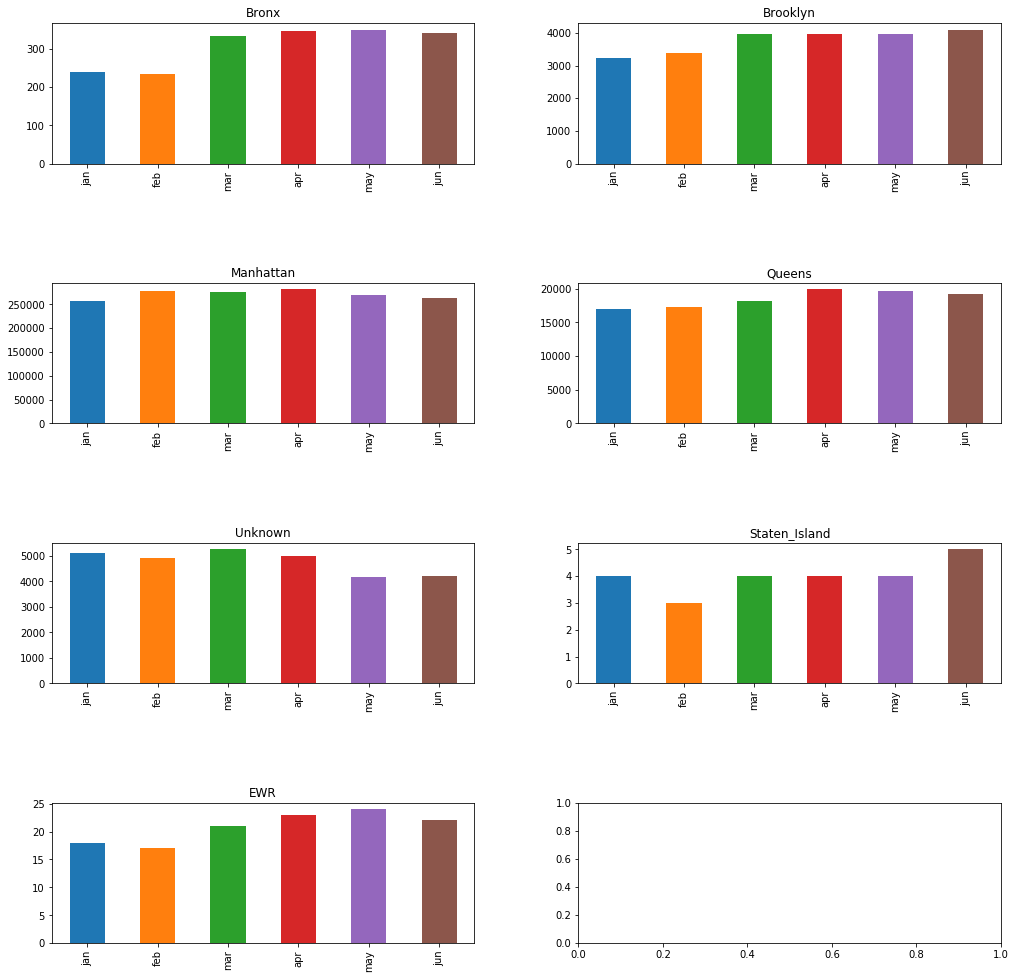

In [27]:
t=tab.T
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.tight_layout()
t.Bronx.plot.bar(title= 'Bronx',figsize=(15,15),ax=axes[0,0])
t.Brooklyn.plot.bar(title= 'Brooklyn',figsize=(15,15),ax=axes[0,1])
t.Manhattan.plot.bar(title= 'Manhattan',figsize=(15,15),ax=axes[1,0])
t.Queens.plot.bar(title= 'Queens',figsize=(15,15),ax=axes[1,1])
t.Unknown.plot.bar(title= 'Unknown',figsize=(15,15),ax=axes[2,0])
t.EWR.plot.bar(title= 'EWR',figsize=(15,15),ax=axes[3,0])
t.Staten_Island.plot.bar(title= 'Staten_Island',figsize=(15,15),ax=axes[2,1])

Now we plot the sum of all trips and the different months

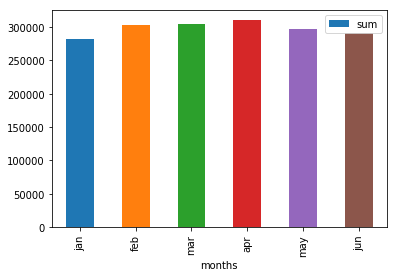

In [28]:
months=['jan','feb','mar','apr','may','jun']
final={}
final['months']=[]
final['sum']=[]
for m in months:
    s=tab[m].sum().sum()
    final['months'].append(m)
    final['sum'].append(s)
final=pandas.DataFrame(final)
final.plot.bar(x='months',y='sum')

## RESULTS [RQ1]

-As we can easly see from the the tha final DataFrame (*tab*) and the plot, Manahattan is the borough that *drive* the fonomenous, this beacuse a very large number of trips start from this zone. Indeed the finacial discrict and most of the offices are in Manahattan. The reach people, infact, use to live in Manhattan and they prefer to use taxi

-From the last plot we can see that during April the sum of the trips is maxim. This is because April is a very turistic month.



**[RQ2]** What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

We add the columns we will need to the function *read_cvs*. In particular we add the column **passenger_count**

In [29]:
def read_csv(month,number):
    cmd= month+" =pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'tpep_pickup_datetime':str,'PULocationID':int,'passenger_count':int}, usecols=['tpep_pickup_datetime','PULocationID','passenger_count'])"
    exec(cmd)
    return eval(month)

The function *divide_per_hour*  takes as input a DataFrame and it makes another one with index all the hours of the day (0:23) and for columns the differents Boroughs of NYC. It indicates us the sum of the taxi's trips every hour.

In [30]:
def divide_per_hour(df):
    cmd="df.loc[:,'hours']=df['tpep_pickup_datetime'].dt.hour"
    exec(cmd)
    cmd="df2=df.groupby(['Borough','hours'])['passenger_count'].agg('sum')"
    exec(cmd)
    cmd="df2.unstack().transpose().fillna(0)"
    df=eval(cmd)
    exec('del df2')
    return df

The function *task_2* take as input the name of the months (always the first three letters) and,with the help of the funtion described before (also in task 1), it create 7 plots.
The first 6 plots show the sum of taxi's trips per hour, for each borough.
The last plot shows the sum of taxi's per hour in all NYC

In [32]:
def task_2(month):
    dfn=month
    n=d[dfn][0]
    df=read_csv(dfn,n)
    cmd="df['tpep_pickup_datetime']=pandas.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')"
    exec(cmd)
    df=clean_errors(df,n)
    df2=merge_zone(df,n)
    del df
    df=divide_per_hour(df2)
    del df2
    df['sum'] = df.sum(axis=1)
    df.rename(columns={'Staten Island': 'Staten_Island'}, inplace=True)
    fig, axes = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    df.Bronx.plot.bar(title= 'Bronx',figsize=(15,15),ax=axes[0,0])
    df.Brooklyn.plot.bar(title= 'Brooklyn',figsize=(15,15),ax=axes[0,1])
    df.Manhattan.plot.bar(title= 'Manhattan',figsize=(15,15),ax=axes[1,0])
    df.Queens.plot.bar(title= 'Queens',figsize=(15,15),ax=axes[1,1])
    df.Unknown.plot.bar(title= 'Unknown',figsize=(15,15),ax=axes[2,0])
    df.Staten_Island.plot.bar(title= 'Staten_Island',figsize=(15,15),ax=axes[2,1])
    df.EWR.plot.bar(title= 'EWR',figsize=(15,15),ax=axes[3,0])
    df2=pandas.DataFrame(df['sum'])
    df2.plot.bar()
    del df
    del df2

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

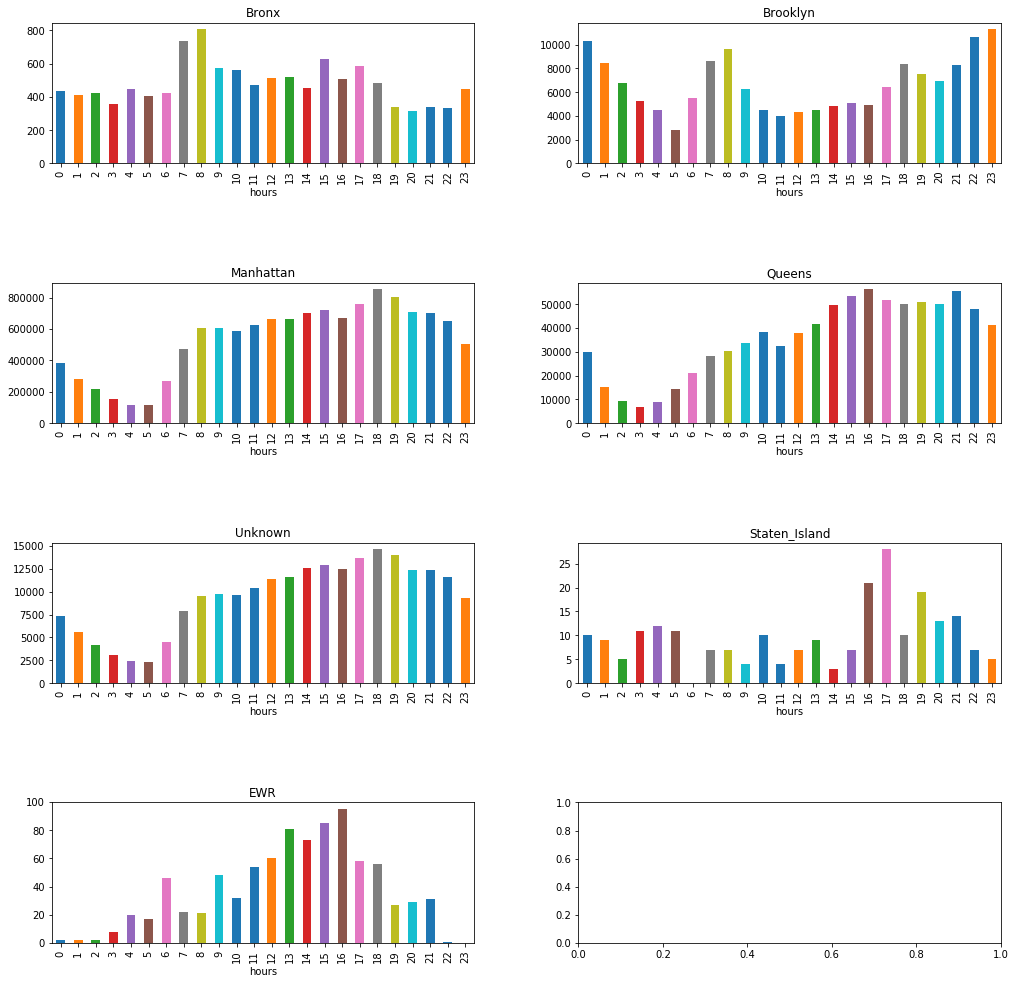

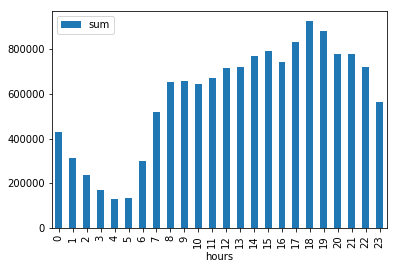

In [33]:
task_2('jan')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

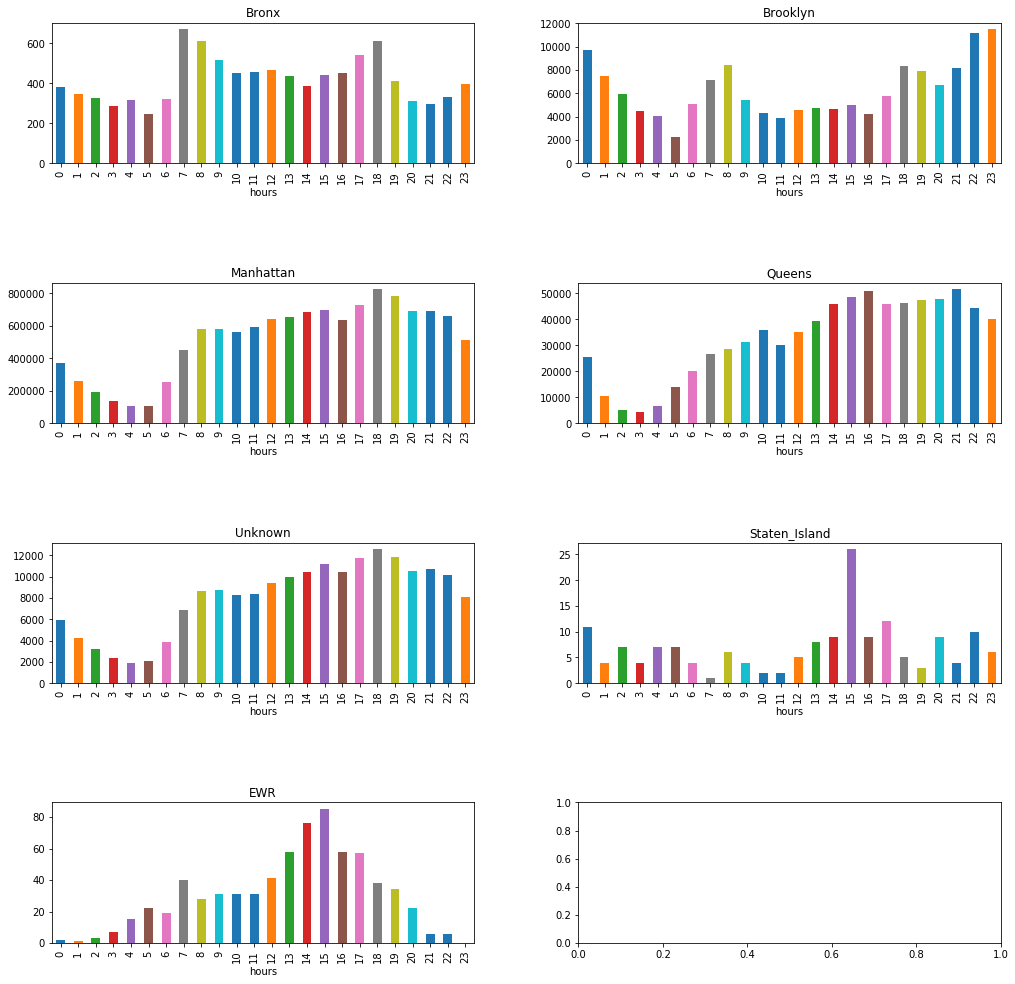

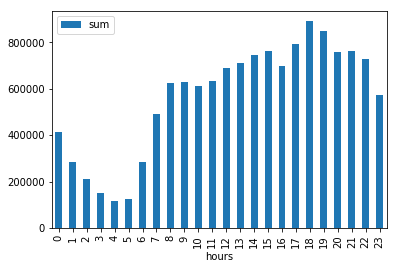

In [34]:
task_2('feb')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

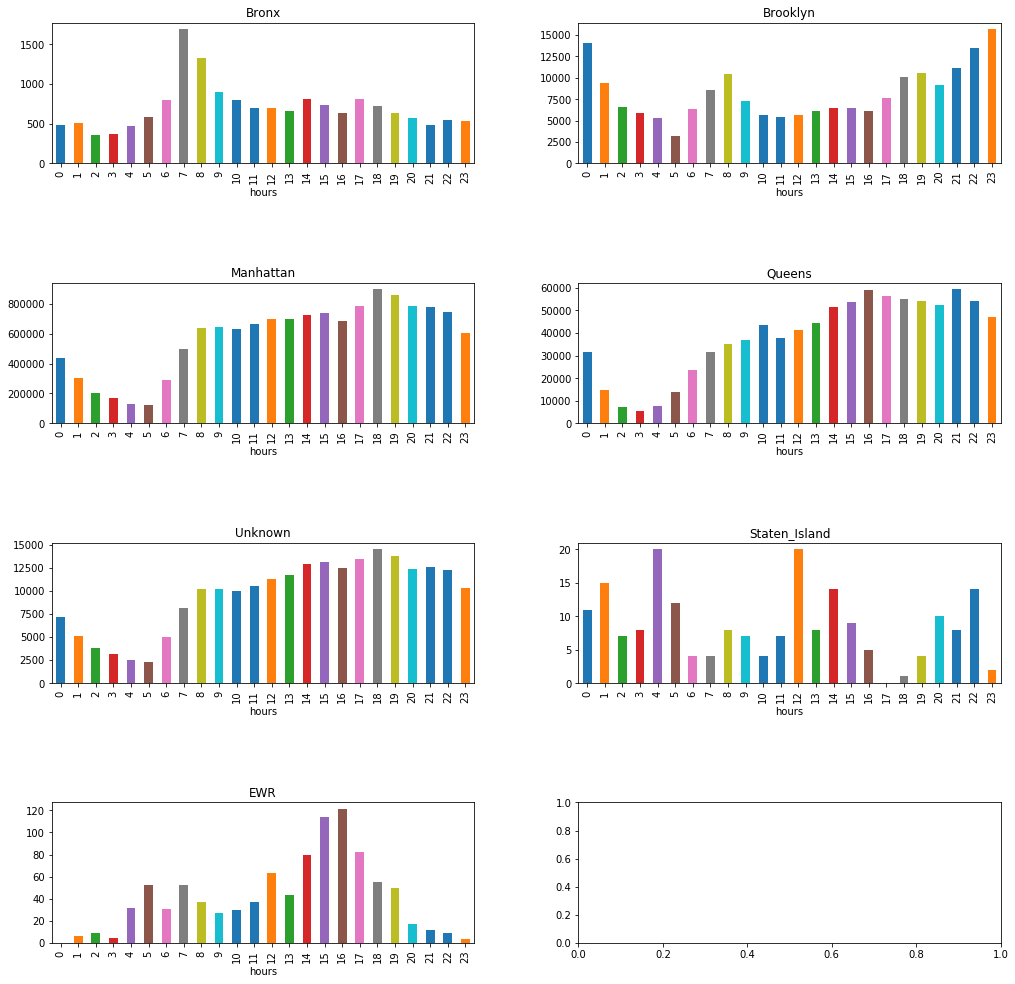

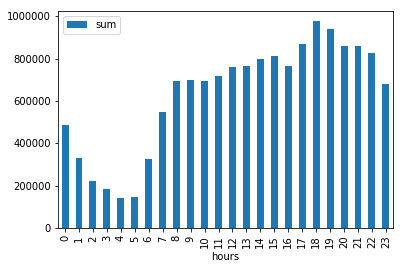

In [35]:
task_2('mar')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

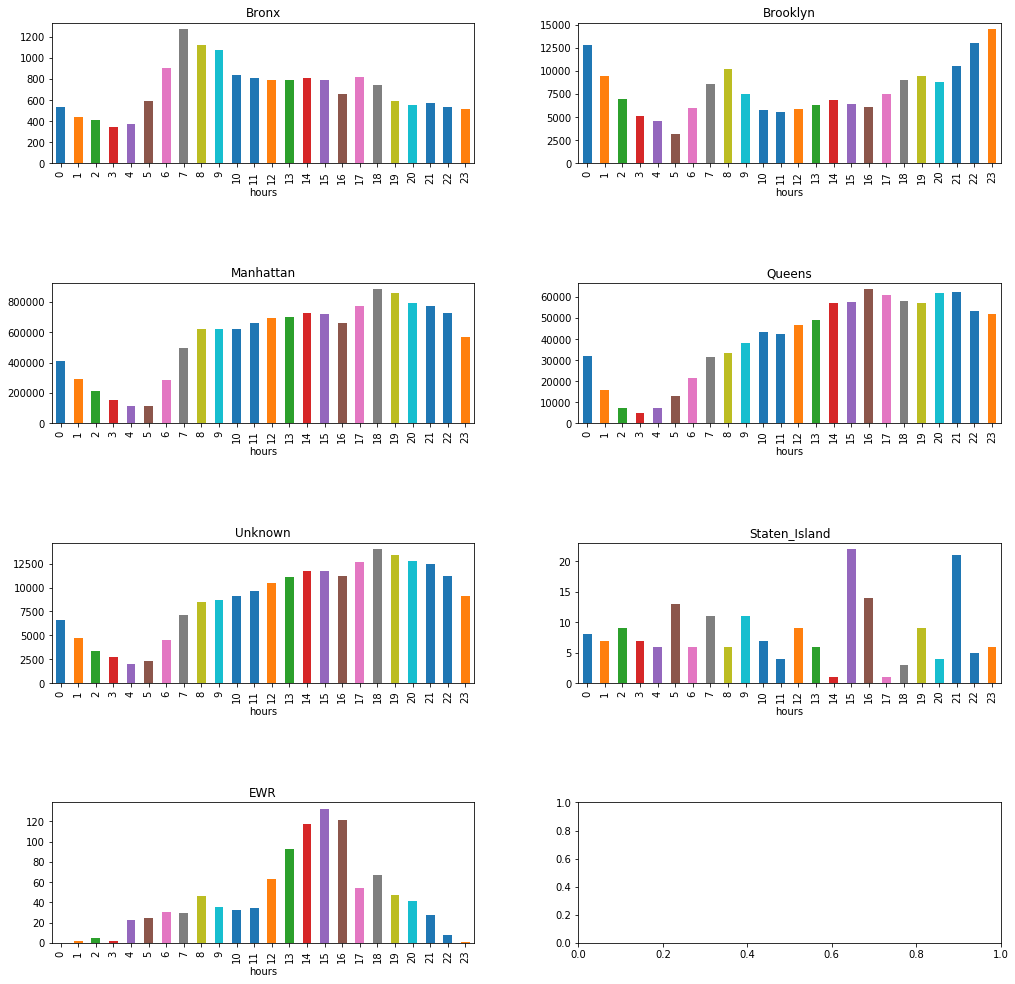

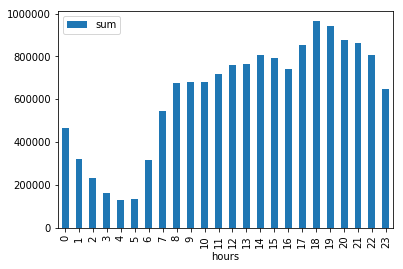

In [36]:
task_2('apr')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

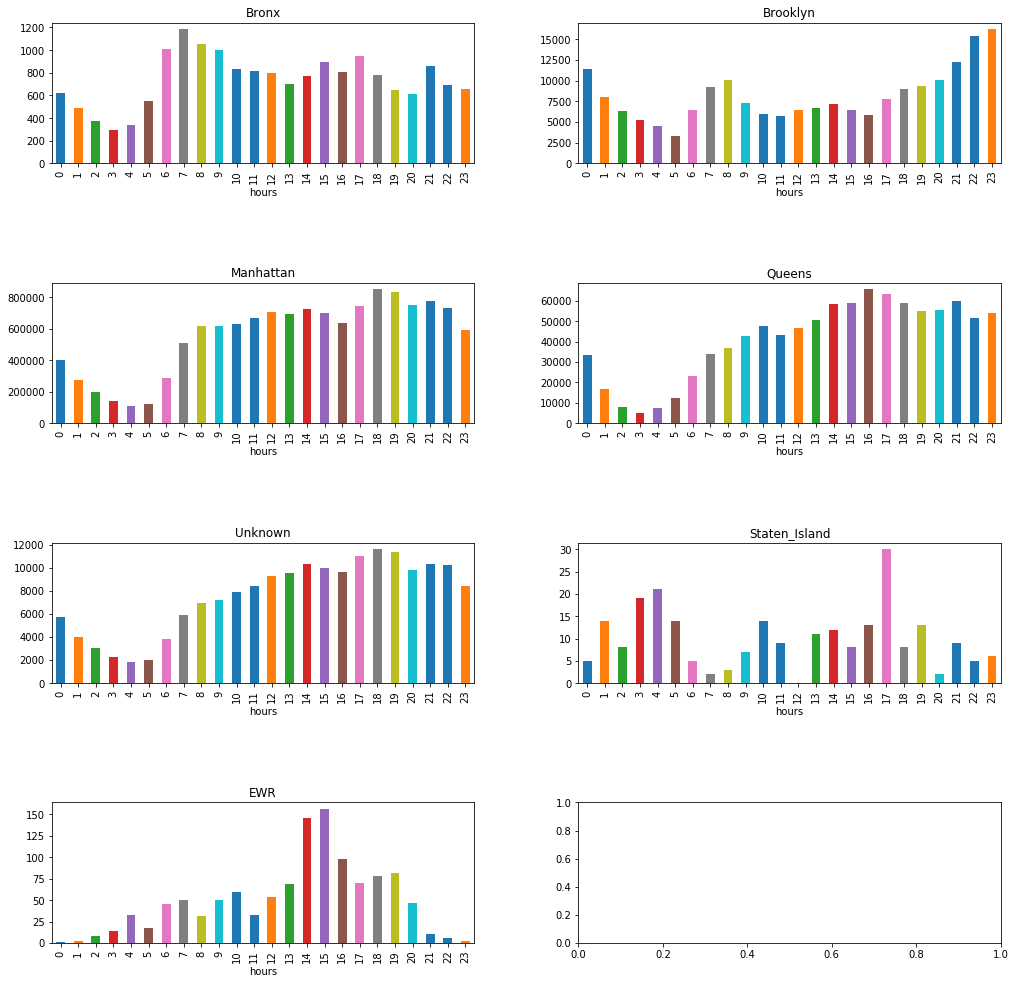

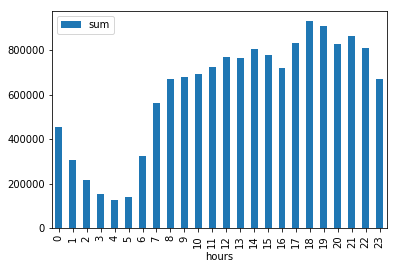

In [37]:
task_2('may')

C:\Users\mvice\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mvice\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

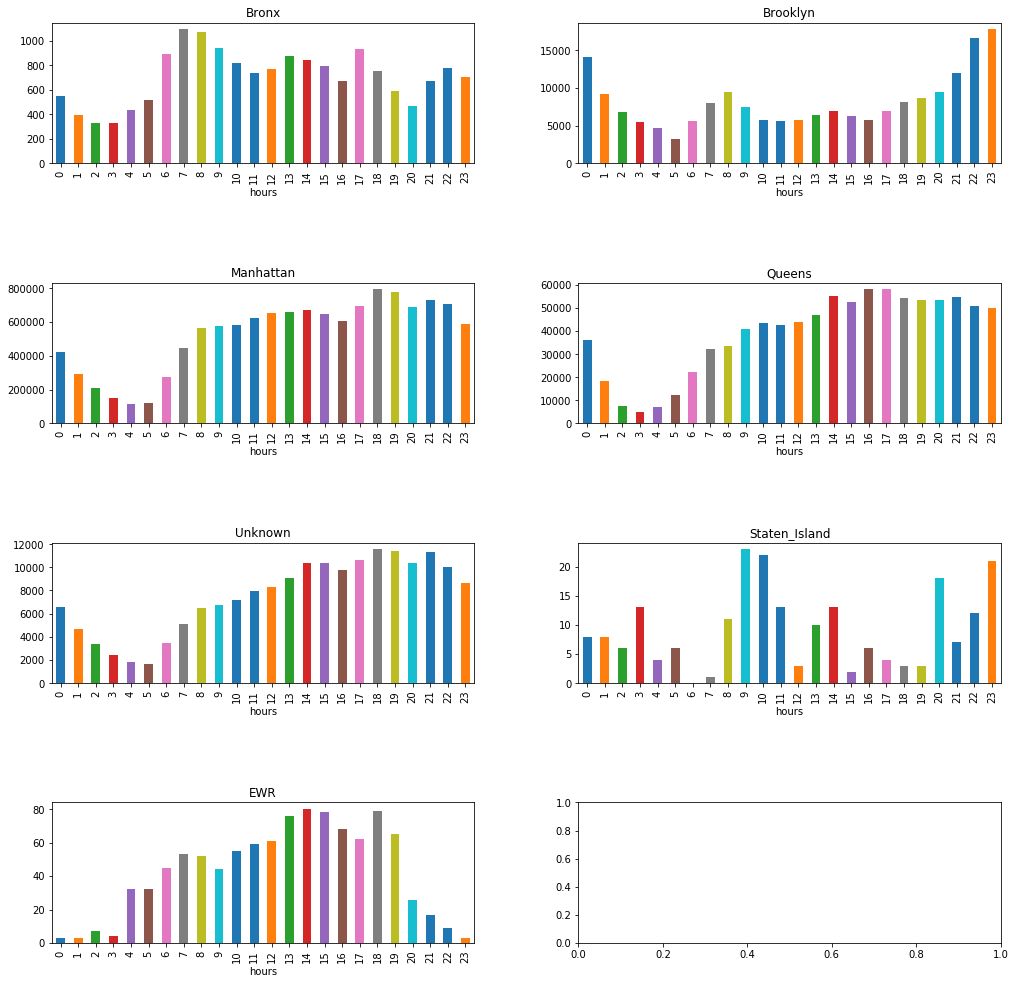

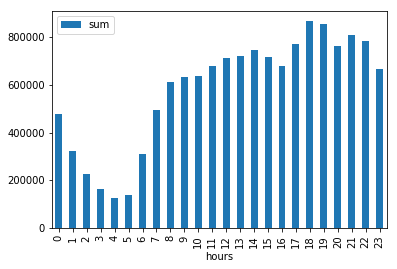

In [38]:
task_2('jun')

## RESULTS [RQ2]

From the last plot od every month, that describe the sum of the trips for each in all NYC, we can easly see that are all similar. Indeed the sum is maxim at 6 PM when the people leave office and go home. The other way around, during night at 4 or 5 AM with have the minimum.

For the same reasons of task 1, Manhattan dives the fenomenous.

From the plot about Bronx we can see we have a maximum at 8 and 9 AM when people go to work, probably in Manhattan.

From the plot about Brooklyn instead we have a maximum during "night" hour, in our opinion because the are several pubs or disco or night clubs are in this neighboor.

Queens has, more or less, the same plot as Manhattan, maybe because also in this zone there are some offices.

We have a few datas about Staten Island, we can not deduce specifi feature about this zone. 


**[RQ3]** Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

We add the columns we will need to the function *read_cvs*. In particular we add the column **tpep_dropoff_datetime** and **trip_distance**

In [2]:
def read_csv(month,number):
    cmd= month+"=pandas.read_csv('yellow_tripdata_2018-0"+str(number)+".csv', sep=',',dtype={'tpep_pickup_datetime':str,'PULocationID':int,'tpep_dropoff_datetime':str , 'trip_distance': float}, usecols=['tpep_pickup_datetime','PULocationID','tpep_dropoff_datetime','trip_distance'])"
    exec(cmd)
    return eval(month)

The function *create_df* takes as input the month we want to consider and the respective number ro each month ('jan'=1;'feb'=2 etc). It compute the duration of each trips and it create a new DataFrame with the duration of the trips and trips distance.


From the data set we noticed that some values are "strange" and don't let us to make a precise plot. We decided to clean the dataset from the values in order to manage to work on the plots.
Indeed we decided to delete three kind on values:
The ones create a negative duration of the trips
The ones have a trip distnce bigger than 200 miles
The ones have a trip's duration larger than 10800 seconds, so larger than 3 hours.



In [3]:
def create_df(m,n):
    df=read_csv(m,n)
    df['tpep_pickup_datetime']=pandas.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    df.loc[:,'month']=df['tpep_pickup_datetime'].dt.month
    df['tpep_dropoff_datetime']=pandas.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
    durata=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
    trip= df['trip_distance']
    del df['trip_distance']
    del df['tpep_dropoff_datetime']
    del df['tpep_pickup_datetime']
    df=df[df['month'] == n]
    del df['month']
    zone=pandas.read_csv('taxi _zone_lookup.csv', sep=',', usecols=['LocationID','Borough'])
    zone.rename(columns={'LocationID': 'PULocationID'}, inplace=True)
    df = pandas.merge(zone, df, on='PULocationID')
    del df['PULocationID']
    del zone
    df['trip_distance']= trip
    del trip
    df['DeltaTime']=durata
    seconds= df['DeltaTime'].dt.total_seconds()
    del df['DeltaTime']
    df['DeltaTime']=seconds
    df['DeltaTime']=pandas.to_numeric(df['DeltaTime'])
    df['trip_distance']=pandas.to_numeric(df['trip_distance'])
    df['DeltaTime']=pandas.to_numeric(df['DeltaTime'])
    df=df[df['trip_distance']<200]
    return df

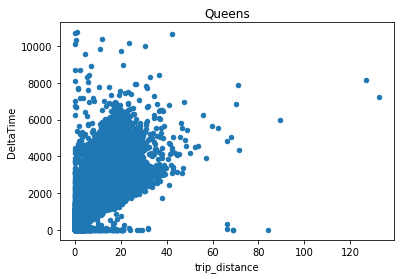

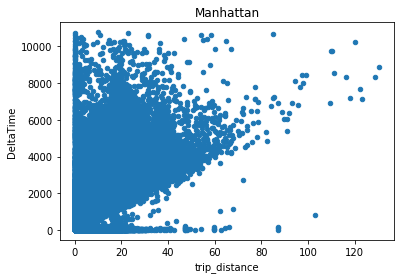

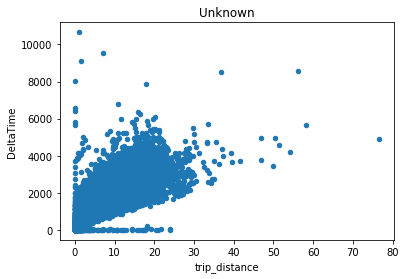

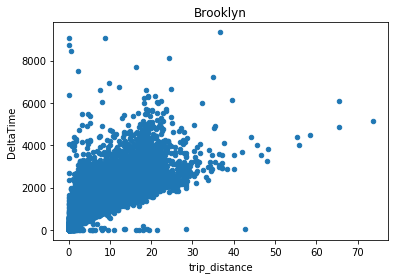

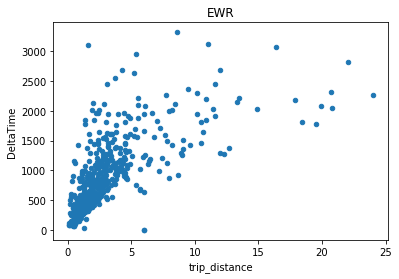

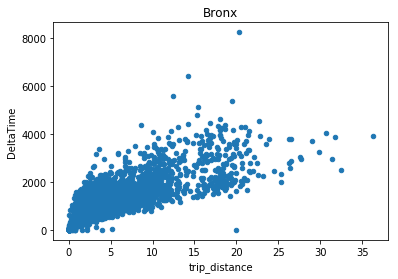

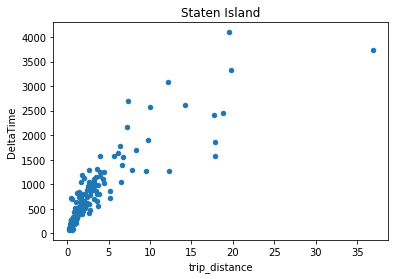

In [7]:
df=create_df('jan',1)
df=df[df['DeltaTime']>0]
df=df[df['DeltaTime']<10800]
bor=["Queens","Manhattan","Unknown",'Brooklyn','EWR',"Bronx","Staten Island"]
for b in bor:
    df2=df[df['Borough']==b]
    df2.plot(kind='scatter',x='trip_distance',y='DeltaTime', title=b)
    del df2
del df

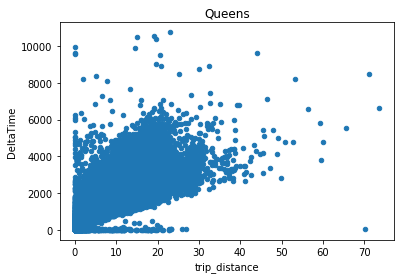

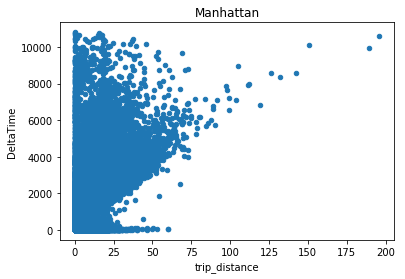

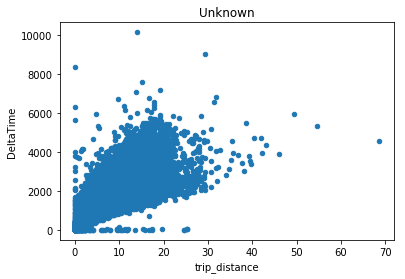

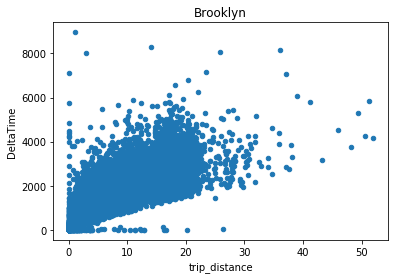

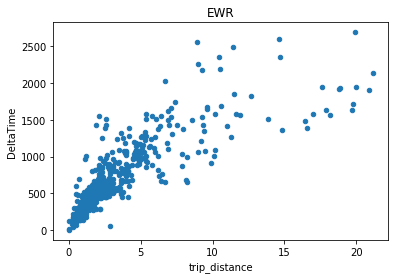

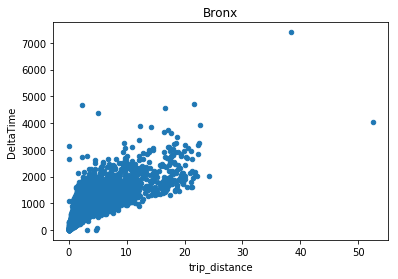

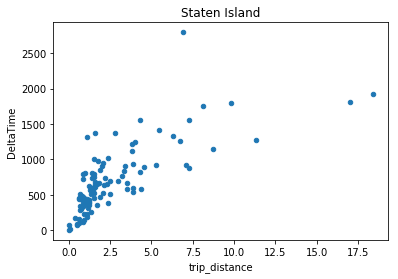

In [8]:
df=create_df('feb',2)
df=df[df['DeltaTime']>0]
df=df[df['DeltaTime']<10800]
bor=["Queens","Manhattan","Unknown",'Brooklyn','EWR',"Bronx","Staten Island"]
for b in bor:
    df2=df[df['Borough']==b]
    df2.plot(kind='scatter',x='trip_distance',y='DeltaTime', title=b)
    del df2
del df

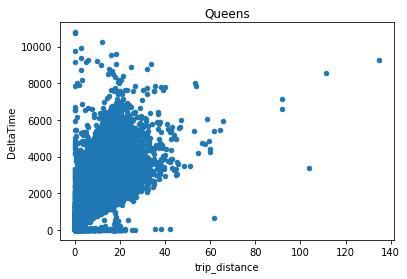

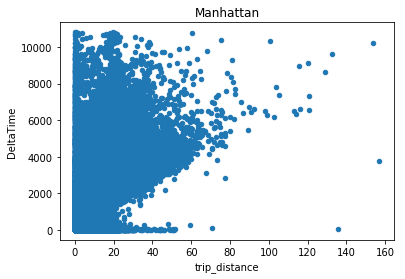

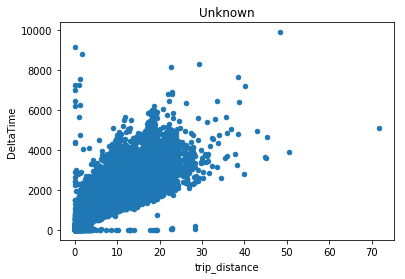

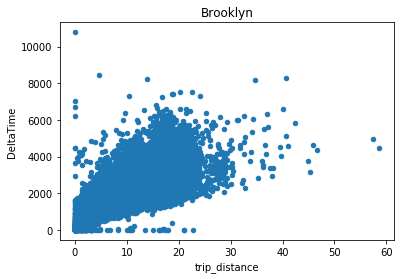

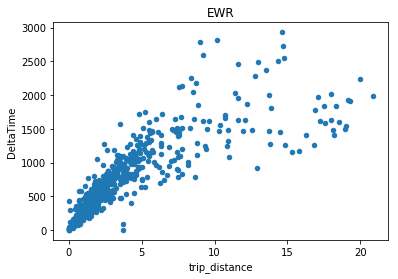

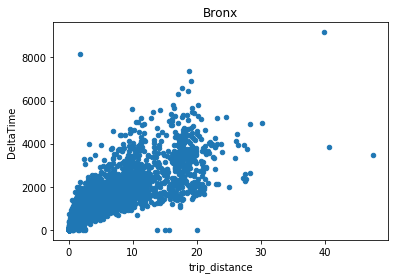

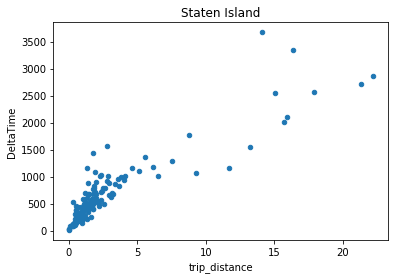

In [13]:
df=create_df('mar',3)
df=df[df['DeltaTime']>0]
df=df[df['DeltaTime']<10800]
bor=["Queens","Manhattan","Unknown",'Brooklyn','EWR',"Bronx","Staten Island"]
for b in bor:
    df2=df[df['Borough']==b]
    df2.plot(kind='scatter',x='trip_distance',y='DeltaTime', title=b)
    del df2
del df

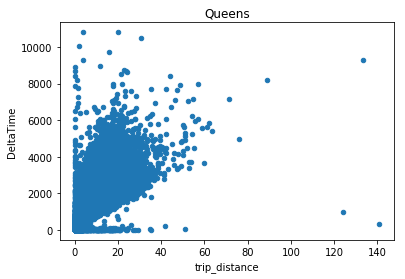

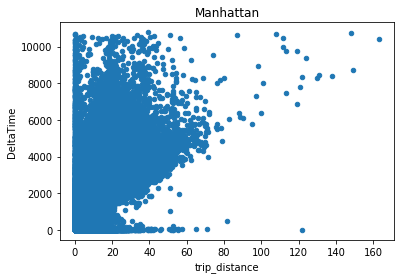

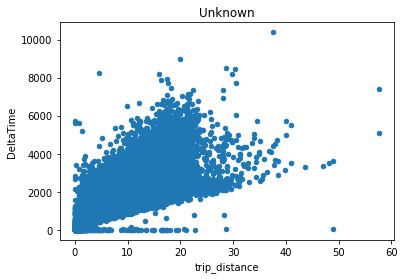

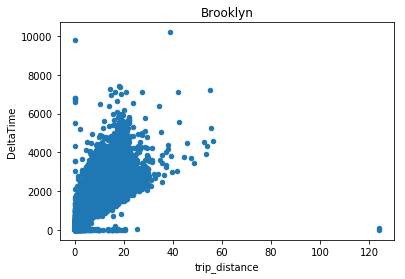

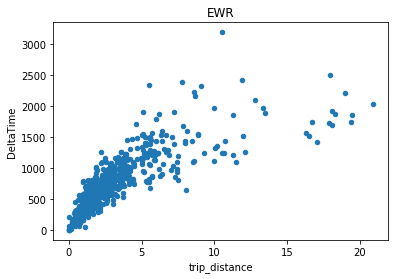

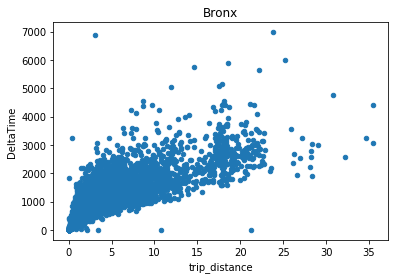

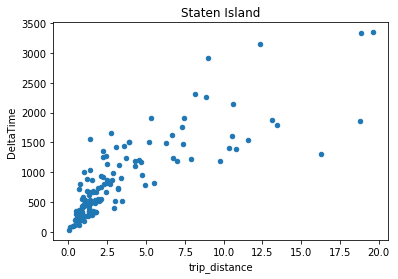

In [10]:
df=create_df('apr',4)
df=df[df['DeltaTime']>0]
df=df[df['DeltaTime']<10800]
bor=["Queens","Manhattan","Unknown",'Brooklyn','EWR',"Bronx","Staten Island"]
for b in bor:
    df2=df[df['Borough']==b]
    df2.plot(kind='scatter',x='trip_distance',y='DeltaTime', title=b)
    del df2
del df

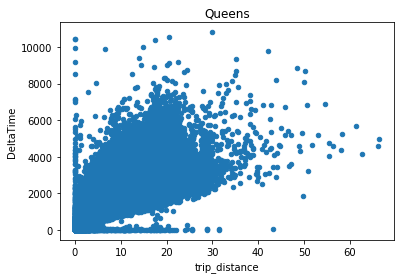

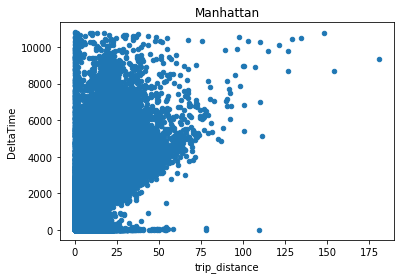

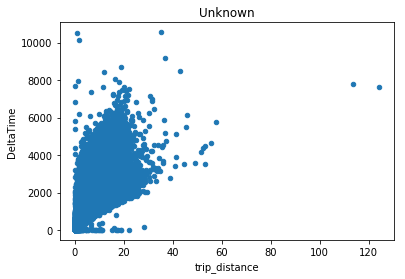

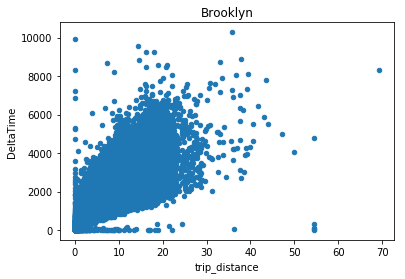

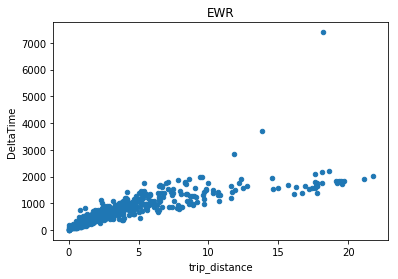

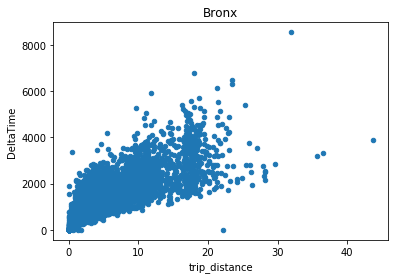

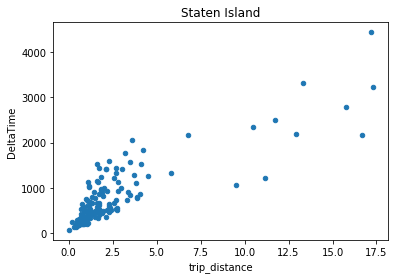

In [11]:
df=create_df('may',5)
df=df[df['DeltaTime']>0]
df=df[df['DeltaTime']<10800]
bor=["Queens","Manhattan","Unknown",'Brooklyn','EWR',"Bronx","Staten Island"]
for b in bor:
    df2=df[df['Borough']==b]
    df2.plot(kind='scatter',x='trip_distance',y='DeltaTime', title=b)
    del df2
del df

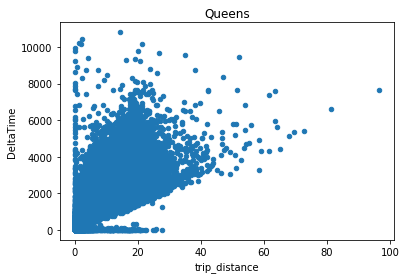

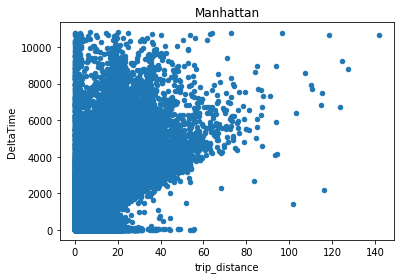

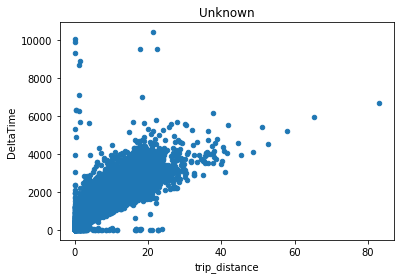

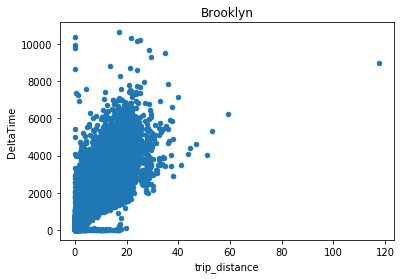

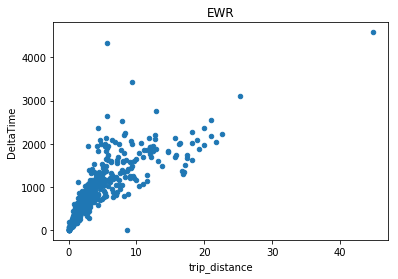

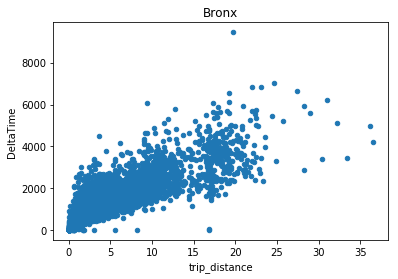

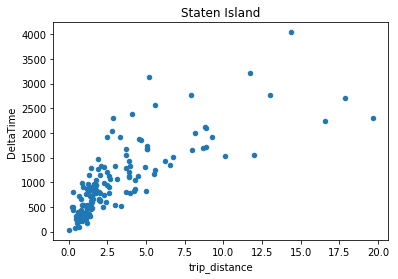

In [12]:
df=create_df('jun',6)
df=df[df['DeltaTime']>0]
df=df[df['DeltaTime']<10800]
bor=["Queens","Manhattan","Unknown",'Brooklyn','EWR',"Bronx","Staten Island"]
for b in bor:
    df2=df[df['Borough']==b]
    df2.plot(kind='scatter',x='trip_distance',y='DeltaTime', title=b)
    del df2
del df

In [4]:
df= pandas.DataFrame()
df["Borough"] = ""
df["trip_distance"] = ""
df["DeltaTime"] = ""

In [5]:
df1=create_df('jan',1)
df=pandas.concat([df,df1])
del df1

In [6]:
df1=create_df('feb',2)
df=pandas.concat([df,df1])
del df1

In [7]:
df1=create_df('mar',3)
df=pandas.concat([df,df1])
del df1

In [8]:
df1=create_df('apr',4)
df=pandas.concat([df,df1])
del df1

In [9]:
df1=create_df('may',5)
df=pandas.concat([df,df1])
del df1

In [10]:
df1=create_df('jun',6)
df=pandas.concat([df,df1])
del df1

In [11]:
df=df[df['DeltaTime']>0]
df=df[df['DeltaTime']<10800]

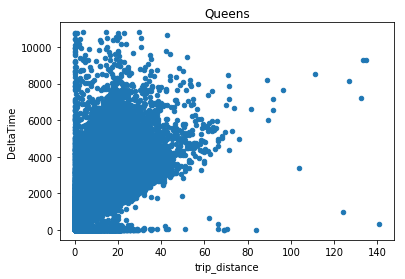

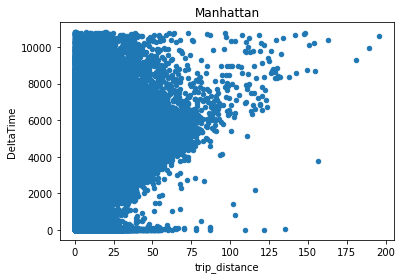

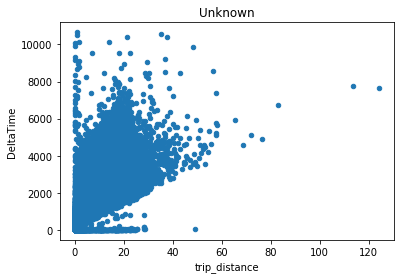

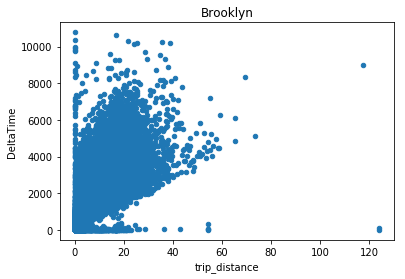

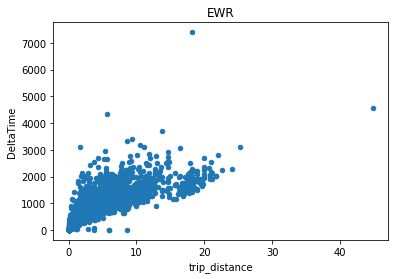

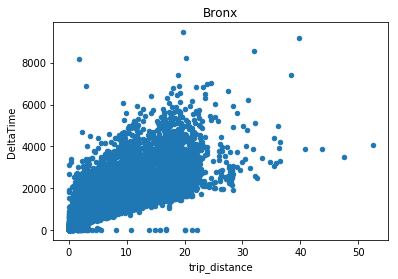

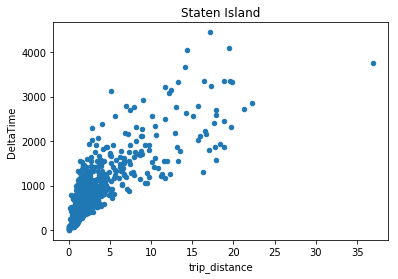

In [14]:
bor=["Queens","Manhattan","Unknown",'Brooklyn','EWR',"Bronx","Staten Island"]
for b in bor:
    df2=df[df['Borough']==b]
    df2.plot(kind='scatter',x='trip_distance',y='DeltaTime', title=b)
    del df2
del df

## RESULTS [RQ3]

We compute the plots for each months and for each Boroughs. 

We selected only some data and from them we can say that there is correlation between **duration** and **trip distance**, indeed we see that duration grows up linearly with trip distance. 

In Manhattan the correlation is weaker because of the traffic.

__[RQ4]__ What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

Below we upload the data for each month and for the zones of NYC to correspondent DataFrame . We explicitly specify a type of data for each column of uploaded data in order to speed up this process.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
fields =['PULocationID','payment_type']
tzlp = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\taxi _zone_lookup.csv', sep=',', dtype={'LocationID': int, 'Borough':str }, usecols=['LocationID','Borough'], index_col='LocationID')
jan = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-01.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
feb = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-02.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
mar = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-03.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
apr = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-04.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
may = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-05.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)
jun = pd.read_csv(r'C:\Users\Farid\Desktop\HW2-ADM-1\yellow_tripdata_2018-06.csv', sep=',', dtype={fields[0]:int, fields[1]:int}, usecols=fields)

Below we create auxilary dictionaries. They will be used to fill the table of frequencies. 
__dictmonth__ is a dictionary where key is the id number of each zone and value is the list of payment types for each trip.
__dictmonthset__ is a dictionary where key is the id number for each zone and value is the list of payment types used during the trips in that zone.

In [4]:
frames=[jan,feb,mar,apr,may,jun]
dictmonth={}
dictmonthset={}
for i in frames:
    month = i
    monthdic = month.to_dict('list')
    lenmonth = len(monthdic['PULocationID'])
    for i in range(lenmonth):
       if (monthdic['PULocationID'])[i] not in dictmonth: dictmonth[month['PULocationID'][i]] = []
       else: dictmonth[(monthdic['PULocationID'])[i]].append((monthdic['payment_type'])[i])
    for i in dictmonth:
        dictmonthset[i]=set(dictmonth[i])
del month

Below we compute a dataframe of observed frequencies of payments for each zone of NYC. Index column of this dataframe<br> consists of id numbers of zones where the clients were picked up. The rest of columns indicates the type of payment.<br>
A numeric code signifying how the passenger paid for the trip:<br>
1 = Credit card<br>
2 = Cash<br>
3 = No charge<br>
4 = Dispute<br>
5 = Unknown<br>
6 = Voided trip<br>
Then we compute a dataframe of frequencies of payments for each borough of NYC.<br>
Then we plot the bar chart and the table of frequencies for boroughs.

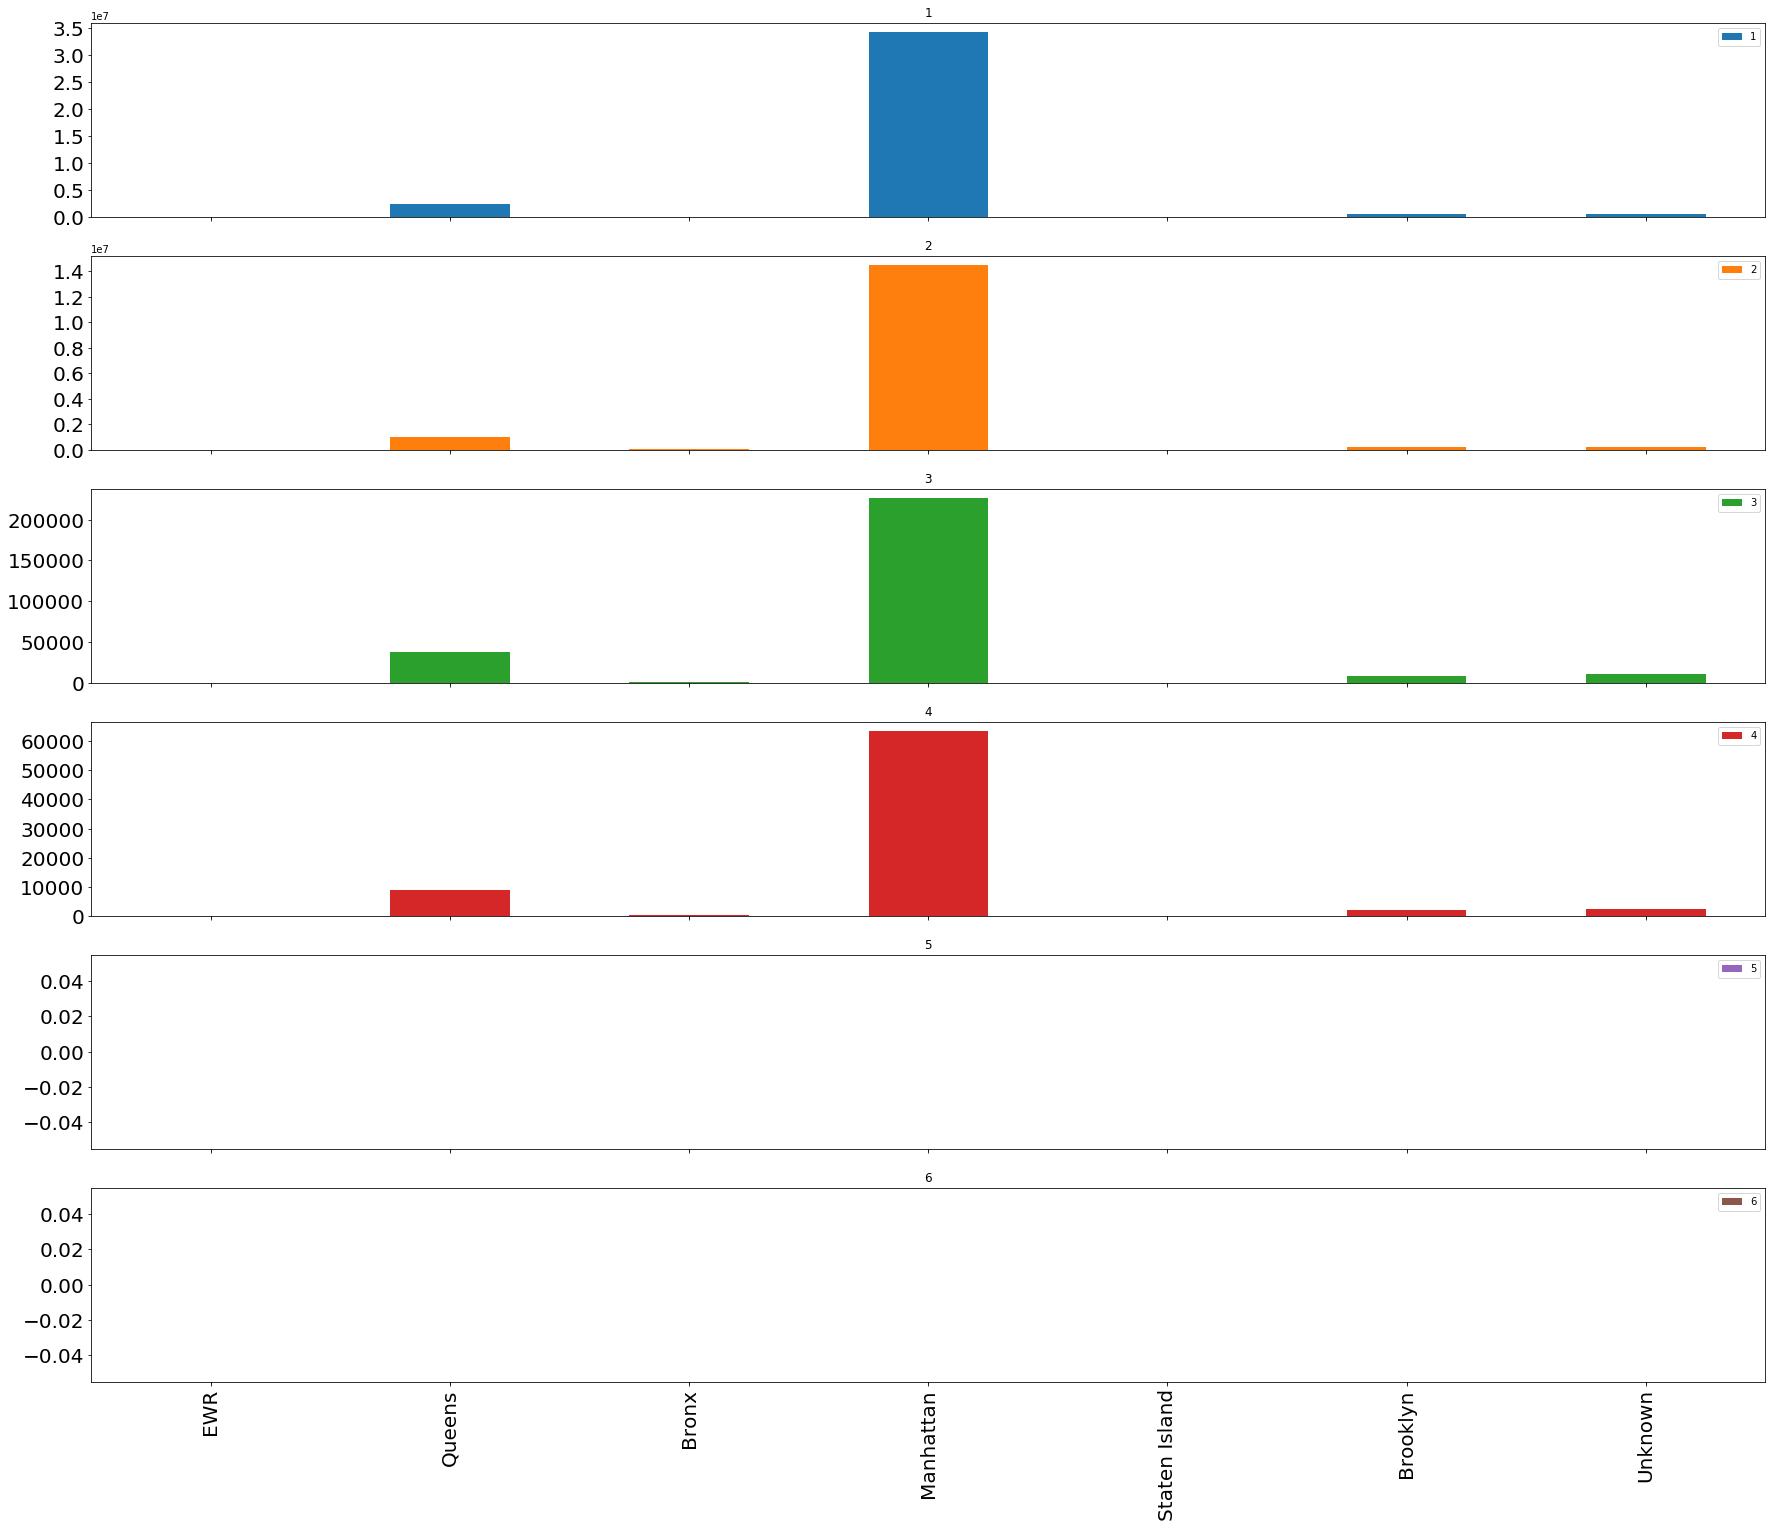

                        1           2         3        4  5  6       total
EWR                3035.0       551.0     220.0     47.0  0  0      3853.0
Queens          2311221.0   1000663.0   37294.0   8935.0  0  0   3358113.0
Bronx             27781.0     26112.0    1514.0    360.0  0  0     55767.0
Manhattan      34188753.0  14480606.0  226799.0  63614.0  0  0  48959772.0
Staten Island       427.0       308.0      48.0     13.0  0  0       796.0
Brooklyn         441860.0    230503.0    8788.0   1923.0  0  0    683074.0
Unknown          595316.0    255817.0   10652.0   2312.0  0  0    864097.0
total          37568393.0  15994560.0  285315.0  77204.0  0  0  53925472.0


In [5]:
month2 = pd.DataFrame(0, index=sorted(dictmonth)+['total'], columns=[1, 2, 3, 4, 5, 6,'total'], dtype=int)
monthbor = pd.DataFrame(0, index=['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', 'Unknown', 'total'], columns=[1, 2, 3, 4, 5, 6,'total'], dtype=int)
for i in dictmonthset:
    for j in dictmonthset[i]:
        month2.loc[i, j] = float(dictmonth[i].count(j)) #float() is used to avoid the overflow of integer values
for j in range(1,7):
    for i in dictmonth:
        monthbor.loc[tzlp.loc[i, 'Borough'], j] += month2.loc[i, j]
mbr=['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', 'Unknown']
for i in mbr:
    monthbor.loc[i, 'total']=sum(monthbor.loc[i])
for i in range(1,7):
    monthbor.loc['total', i]=sum(monthbor[i])

if sum(monthbor['total'])==sum(monthbor.loc['total']):
            monthbor.loc['total', 'total']=sum(monthbor['total'])
else:       monthbor.loc['total', 'total']= 'error'
mbbor = pd.DataFrame(0, index=['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', 'Unknown'], columns=[1, 2, 3, 4, 5, 6], dtype=int)
month2=monthbor #This step appeared during fixing of the code in order to avoid other corrections
for i in mbr:
    for j in range(1,7):
        mbbor.loc[i,j]=monthbor.loc[i,j]
mbbor.plot.bar(subplots=True, figsize=(30,25), fontsize=20)
plt.show()
print(month2)

$\chi^2$ test:
    Suitable null and alternative hypotheses might be:
    
    $H_{0}$: There is not any dependacy among the boroughs and the types of payments
    $H_{1}$: There is some dependacy among the boroughs and the types of payments
The expected numbers (under the null hypothesis) in each cell are equal to
$\frac{row\,total\,*\,column\,total}{grand\,total}$
Below we compute a dataframe consisting of expected numbers.

In [6]:
month3= pd.DataFrame(0, index=mbr, columns=[1, 2, 3, 4, 5, 6], dtype=int)
for i in mbr:
    for j in range(1,7):
        mn2it=month2.loc[i, "total"]
        mn2tj=month2.loc["total", j]
        mn2tt=month2.loc['total', 'total']
        month3.loc[i,j]= (mn2it*mn2tj)/mn2tt

To calculate the $\chi^2$ statistic the value of $\frac{(observed\,frequency\,-\,expected\,frequency)^2}{expected\,frequency}$ needs to be calculated for each cell in the table. Then we sum all the values in each cell of an obtained dataframe.

In [7]:
month4= pd.DataFrame(0, index=mbr, columns=[1, 2, 3, 4, 5, 6], dtype=int)
for i in mbr:
    for j in range(1,7):
        mn2ij=month2.loc[i,j]
        mn3ij=month3.loc[i, j]
        if mn3ij!=0:  month4.loc[i, j]=((mn2ij-mn3ij)**2)/mn3ij
        else: month4.loc[i,j] = 0
print('chi^2=', sum(month4))

chi^2= 21


# RESULTS [RQ4]
What is the most common way of payments?
It can be said for sure that most often people pay by credit card. The number of payment by credit card is more than two times bigger than the number of payment by cash ('the second biggest result'). There was not any unknown type of payments or voided trips during the first part of the year 2018.
Concerning the $\chi^2$ test, we obtained the result value which is equal to $21$. Considering that there is $5$ degrees of freedom the __p-value__ is __0.0081__. The result is significant at __p < 0.05__. So we do not observe any correlation between the payment types and boroughs.